# Restaurant Data Analysis – Capstone Project
## Objective
The objective of this project is to analyze restaurant data to understand customer behavior, restaurant distribution, pricing patterns, cuisine trends, and factors influencing ratings.  
The insights will help identify high-performing restaurants and support data-driven business decisions.


In [1]:
import pandas as pd

## Dataset Overview

This dataset contains information about restaurants across multiple countries and cities.  
It includes attributes related to location, cuisines, cost, ratings, votes, and service availability such as online delivery and table booking.

Key datasets used:
- Restaurant data
- Country code mapping


In [2]:
data_set = pd.read_excel(r"D:/marketing/Dataset/data.xlsx")
country_code = pd.read_excel(r"D:/marketing/Dataset/Country-Code.xlsx")
variable_desc = pd.read_excel(r"D:/marketing/Dataset/variable description.xlsx",index_col = "Variable")

In [3]:
data = pd.merge(data_set,country_code,on = "Country Code", how = "left" )

In [4]:
# country_code.info()
pd.set_option("display.max_columns",21)

In [5]:
# For understanging the data we see their rows,columns and null value also
# data.info()
# data.head(2)

## Data Cleaning

The following data cleaning steps were performed:

- Removed duplicate records where applicable
- Handled missing values in numerical columns
- Converted categorical values into consistent formats
- Trimmed whitespace from text columns
- Split and normalized multi-value columns such as `Cuisines`
- Identified and handled outliers in `Average Cost for Two` using the IQR method

Median-based analysis was preferred for cost-related fields due to the presence of extreme outliers.


In [6]:
# Handling with Null Values and fill them with appropriate value
data.isna().sum() #Give sum of the missing values
data["Cuisines"].isna().sum()
data[data["Cuisines"].isna()]
data["Cuisines"] = data["Cuisines"].fillna("Not Specified")
data["Restaurant Name"] = data["Restaurant Name"].fillna("Unknown")

In [7]:
# Checking for duplicates
data.duplicated().sum()  # give the sum of duplicate value
data[data.duplicated()] # Give the duplicate rows
data.drop_duplicates(inplace=True)  # Drop the duplicates rows 

In [8]:
# Checking Data after removing nulls and duplicates
# data.info()

## Geographical Distribution of Restaurants

- Analyzed restaurant counts city-wise and country-wise
- Identified cities with maximum and minimum number of restaurants
- Observed strong concentration of restaurants in metropolitan cities


In [9]:
# Identify the Cities with the maximum and minimu number of Restaurants
geog_data = data.groupby("City")["Restaurant ID"].count()
geog_data = geog_data.sort_values(ascending=False)
geog_data.nlargest(1)

City
New Delhi    5473
Name: Restaurant ID, dtype: int64

In [10]:
geog_data.nsmallest(1)

City
Balingup    1
Name: Restaurant ID, dtype: int64

# Simple Bar graph for understinding the data better


<Axes: title={'center': 'Top 10 Cities by Number of Restaurants'}, xlabel='City'>

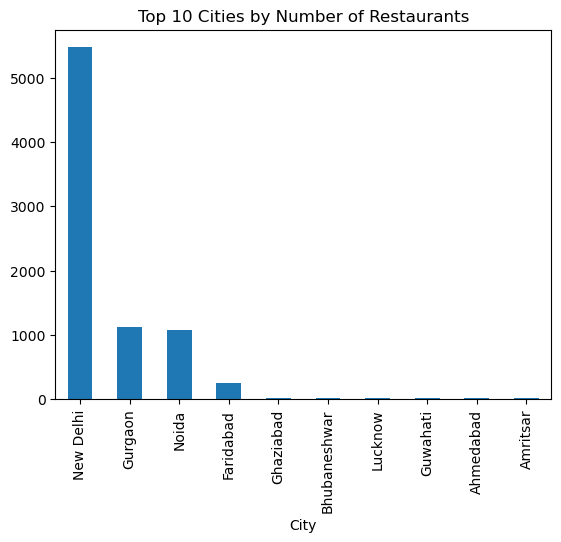

In [11]:
geog_data_no_outlier = geog_data[geog_data < 7000]
geog_data.nlargest(10).plot(kind="bar", title="Top 10 Cities by Number of Restaurants")

<Axes: title={'center': 'Bottom 10 Cities by Number of Restaurants'}, xlabel='City'>

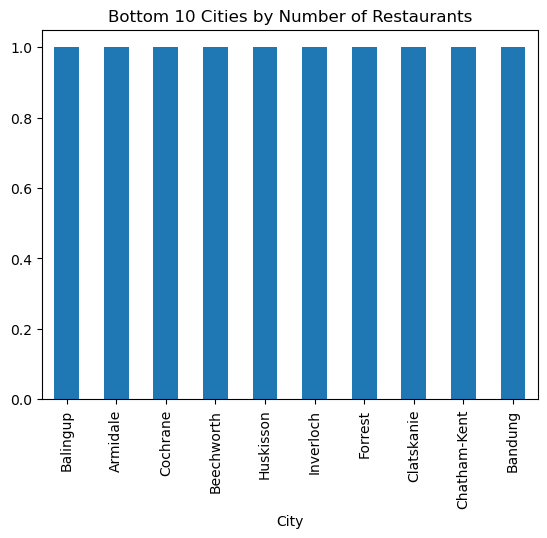

In [12]:
geog_data.nsmallest(10).plot(kind="bar", title="Bottom 10 Cities by Number of Restaurants")

In [13]:
# Seeing the data for better analysis
# data["Average Cost for two"].nlargest(50)

In [14]:
Q1 = data["Average Cost for two"].quantile(0.25)
Q3 = data["Average Cost for two"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

1375.0


In [15]:
# IQR upper bound ≈ ₹1,375
# Many values go far beyond this (₹4,500 to ₹80,000)
data["Average Cost for two"].median()

400.0

In [16]:
data.groupby("City")["Average Cost for two"].median().nlargest(20)

City
Tangerang           250000.0
Jakarta             200000.0
Bogor               160000.0
Bandung             150000.0
Colombo               2200.0
Panchkula             2000.0
Pasay City            2000.0
Taguig City           1650.0
Mandaluyong City      1500.0
Hyderabad             1450.0
Bangalore             1300.0
Pune                  1300.0
Jaipur                1250.0
Kolkata               1200.0
Ludhiana              1200.0
Tagaytay City         1200.0
Makati City           1150.0
Inner City            1120.0
Goa                   1100.0
Lucknow               1000.0
Name: Average Cost for two, dtype: float64

<Axes: >

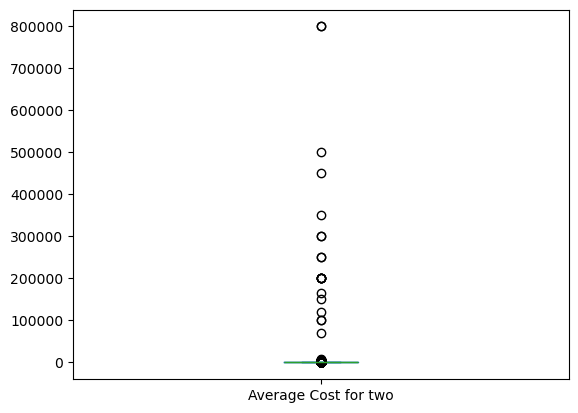

In [17]:
data["Average Cost for two"].plot(kind="box")

<Axes: ylabel='Frequency'>

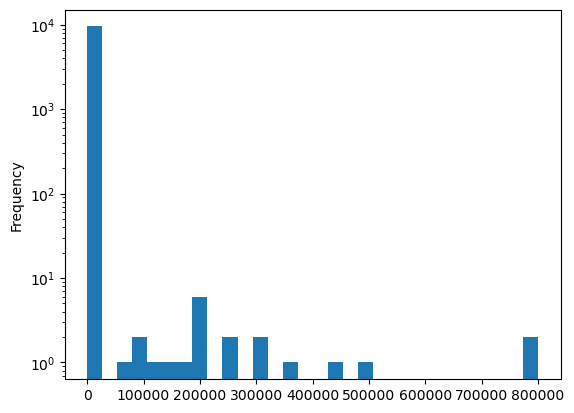

In [18]:
data["Average Cost for two"].plot(kind="hist", log=True, bins=30)

In [19]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


## Franchise and National Presence Analysis

- Grouped restaurants by name and counted unique countries
- Identified franchises with presence across multiple countries
- Found that only a small number of brands have wide national presence


In [20]:
country_count = data.groupby("Country")["Restaurant ID"].agg("count")
country_count.sort_values()

Country
Canada               4
Qatar               20
Sri Lanka           20
Singapore           20
Indonesia           21
Phillipines         22
Australia           24
Turkey              34
New Zealand         40
Brazil              60
UAE                 60
South Africa        60
United Kingdom      80
United States      434
India             8652
Name: Restaurant ID, dtype: int64

In [21]:
country_count.sum()

np.int64(9551)

<Axes: title={'center': 'Top 5 Restaurant distribution by country'}, xlabel='Country'>

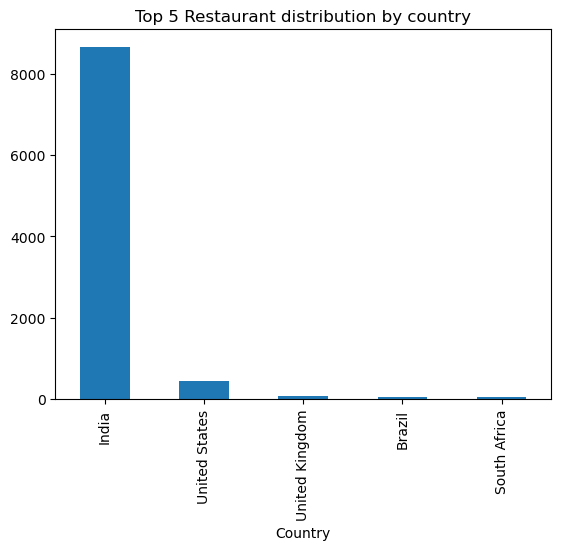

In [43]:
country_count.nlargest(5).plot(kind="bar", title="Top 5 Restaurant distribution by country")

<Axes: title={'center': 'Bottom 5 Restaurant distribution by country'}, xlabel='Country'>

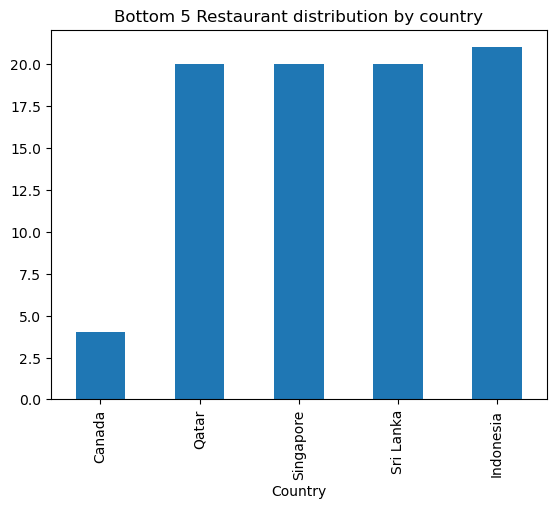

In [44]:
country_count.nsmallest(5).plot(kind="bar", title="Bottom 5 Restaurant distribution by country")

# franchise with most national presence

In [24]:
national_presence = (
    data.groupby("Restaurant Name")["Country"]
    .nunique()
    .sort_values(ascending=False)
)
national_presence

Restaurant Name
Hard Rock Cafe          3
Indian Coffee House     2
Ichiban                 2
Gazebo                  2
Jamie's Italian         2
                       ..
t Lounge by Dilmah      1
tashas                  1
wagamama                1
{Niche} - Cafe & Bar    1
#Dilliwaala6            1
Name: Country, Length: 7446, dtype: int64

<Axes: title={'center': 'Franchies With Most National Presence'}, ylabel='Country'>

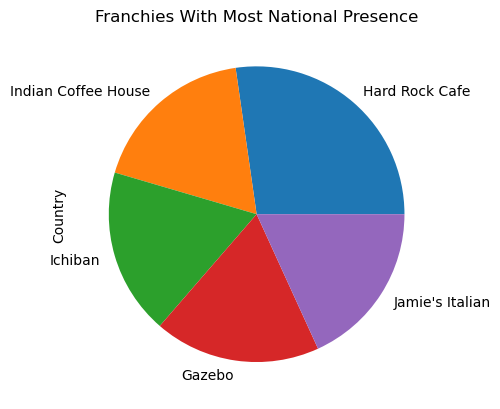

In [25]:
national_presence.nlargest(5).plot(kind = "pie",title = "Franchies With Most National Presence")

# Who have the maximum number of franchise


In [26]:
franchise_count = data["Restaurant Name"].value_counts().sort_values(ascending = False)
franchise_count

Restaurant Name
Cafe Coffee Day                  83
Domino's Pizza                   79
Subway                           63
Green Chick Chop                 51
McDonald's                       48
                                 ..
BMG - All Day Dining              1
Atmosphere Grill Cafe Sheesha     1
UrbanCrave                        1
Deena Chat Bhandar                1
Mittal Fast Food                  1
Name: count, Length: 7446, dtype: int64

<Axes: title={'center': 'Reataurant with maximum number of franchise'}, ylabel='Restaurant Name'>

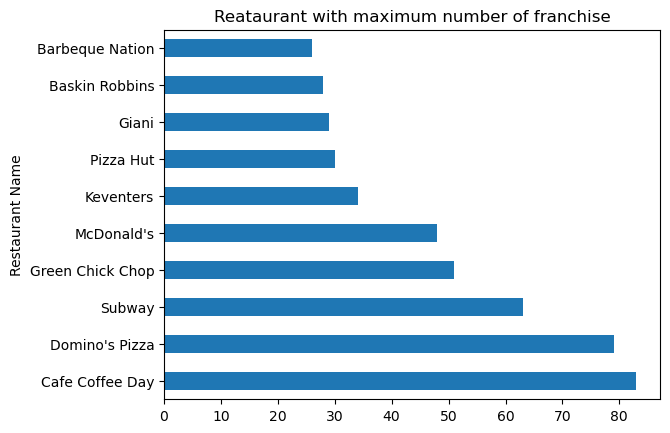

In [45]:
franchise_count.nlargest(10).plot(kind = "barh",title = "Reataurant with maximum number of franchise")

## Table Booking Analysis

- Calculated the ratio of restaurants that allow table booking vs those that do not
- Observed that a majority of restaurants do not provide table booking
- Visualized the distribution using percentage-based charts

In [28]:
# Find out the ratio b/w restaurants the allow table booking v/s that don not allow table booking
data["Has Table booking"].value_counts(normalize = True) * 100

Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

In [29]:
total_booking = data["Has Table booking"].count()
has_table_booking = data[data["Has Table booking"]=="Yes"]["Has Table booking"].count()
has_not_table_booking = data[data["Has Table booking"]=="No"]["Has Table booking"].count()

In [30]:
print(f"Total Booking : {total_booking} \nHas Table Booking : {has_table_booking} \nHas not Table Booking : {has_not_table_booking}")

Total Booking : 9551 
Has Table Booking : 1158 
Has not Table Booking : 8393


In [31]:
per_table_booking = round(has_table_booking * 100 / total_booking)
per_not_table_booking = round(has_not_table_booking * 100 / total_booking)

In [32]:
print(f"Percent Table Booking : {per_table_booking}% \nPercent Has not Table Booking : {per_not_table_booking}%")

Percent Table Booking : 12% 
Percent Has not Table Booking : 88%


In [33]:
perBooking = round(data["Has Table booking"].value_counts(normalize = True) * 100)
perBooking

Has Table booking
No     88.0
Yes    12.0
Name: proportion, dtype: float64

<Axes: title={'center': 'Percentage of Restaurants tha allow table  booking'}, ylabel='proportion'>

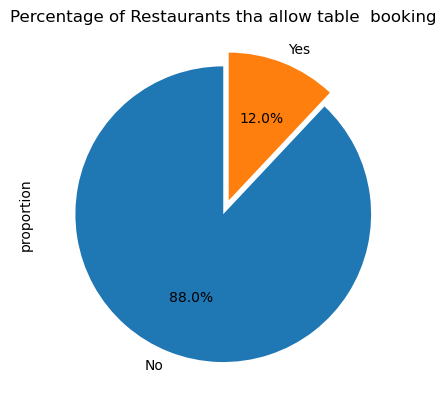

In [34]:
perBooking.plot(kind= "pie",title = "Percentage of Restaurants tha allow table  booking"
               ,autopct = "%.1f%%"
                ,explode = (0, 0.10)
               ,startangle = 90)

## Online Delivery Analysis

- Calculated the percentage of restaurants offering online delivery
- Compared total and average votes for delivery vs non-delivery restaurants
- Found that restaurants offering online delivery tend to receive higher customer engagement


In [35]:
per_online_delivery = round(data["Has Online delivery"].value_counts(normalize = True) * 100 )

In [36]:
per_online_delivery

Has Online delivery
No     74.0
Yes    26.0
Name: proportion, dtype: float64

<Axes: title={'center': 'Percentage of Restautrant the provide online delivery'}, ylabel='proportion'>

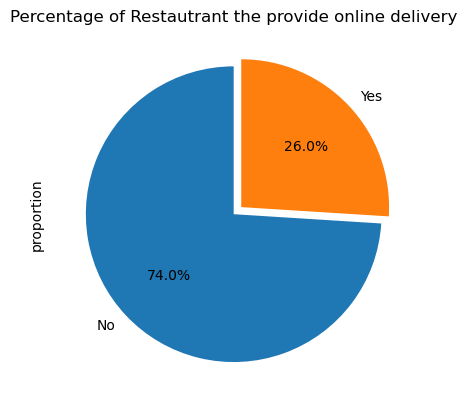

In [37]:
per_online_delivery.plot(kind = "pie"
                        ,title = "Percentage of Restautrant the provide online delivery"
                        ,startangle = 90
                        ,explode = (0,0.07)
                        ,autopct = "%0.1f%%")

In [38]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


## Votes Difference Analysis

- Compared total votes received by delivery and non-delivery restaurants
- Observed a significant difference in vote counts
- Delivery-enabled restaurants showed higher overall visibility


In [39]:
total_vote = data["Votes"].sum()
total_vote_avg = data["Votes"].mean()
votes_that_deliver = data[data["Has Online delivery"]=="Yes"]["Votes"].sum()
votes_that_donot_deliver = data[data["Has Online delivery"]=="No"]["Votes"].sum()

In [40]:
diffinVotes = votes_that_deliver - votes_that_donot_deliver
print(f"different in no of votes that deliver and that do not deliver : {diffinVotes} \nvotes thet deliver : {votes_that_deliver} \nvotes that do not deliver : {votes_that_donot_deliver}")

different in no of votes that deliver and that do not deliver : -462817 
votes thet deliver : 517914 
votes that do not deliver : 980731


In [41]:
avg_votes_by_delivery = data.groupby("Has Online delivery")["Votes"].mean().round(1)
avg_votes_by_delivery

Has Online delivery
No     138.1
Yes    211.3
Name: Votes, dtype: float64

In [42]:
data.to_csv("cleaned_zomato_data.csv",index = False)